<a href="https://colab.research.google.com/github/thuongvan23/XAI-LandCover/blob/nhanLD/ResNet_satellite_unfrozen_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tifffile
!pip install rasterio
!pip install efficientnet_pytorch
!pip install -q kaggle
!pip install albumentations

# Tạo thư mục kaggle và chép file config vào
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.8 MB/s eta 0:00:00
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-

In [ ]:
!kaggle datasets download -d apollo2506/eurosat-dataset
!unzip eurosat-dataset.zip -d ./eurosat_data

In [ ]:
import tifffile as tiff
import numpy as np

# Đường dẫn đến 1 ảnh cụ thể
img_path = "/content/eurosat_data/EuroSATallBands/AnnualCrop/AnnualCrop_1.tif"

# Đọc ảnh
img = tiff.imread(img_path)

# In shape và giá trị pixel đầu tiên
print("Shape của ảnh:", img.shape)
print("Pixel đầu tiên:", img[0, 0])

Shape của ảnh: (64, 64, 13)
Pixel đầu tiên: [1420 1291 1291 1600 1680 1841 2045 2016  546   13 3083 2325 2319]


In [ ]:
# Chuẩn hóa giá trị pixel trong dải từ 0 đến 1
img_normalized = img / np.max(img)

print(np.max(img))

# Kiểm tra pixel sau khi chuẩn hóa
print("Pixel đầu tiên (sau khi chuẩn hóa):", img_normalized[0, 0])

3490
Pixel đầu tiên (sau khi chuẩn hóa): [0.40687679 0.36991404 0.36991404 0.45845272 0.48137536 0.52750716
 0.58595989 0.57765043 0.15644699 0.00372493 0.88338109 0.66618911
 0.66446991]


In [ ]:
import os

root_dir = "/content/eurosat_data/EuroSATallBands"

for root, dirs, files in os.walk(root_dir):
    level = root.replace(root_dir, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for f in files[:5]:
        print(f"{subindent}{f}")

EuroSATallBands/
  label_map.json
  validation.csv
  train.csv
  test.csv
  Highway/
    Highway_653.tif
    Highway_683.tif
    Highway_412.tif
    Highway_1466.tif
    Highway_2240.tif
  Forest/
    Forest_1130.tif
    Forest_2638.tif
    Forest_1724.tif
    Forest_2213.tif
    Forest_2170.tif
  AnnualCrop/
    AnnualCrop_1702.tif
    AnnualCrop_2061.tif
    AnnualCrop_1703.tif
    AnnualCrop_2397.tif
    AnnualCrop_399.tif
  Residential/
    Residential_1325.tif
    Residential_2774.tif
    Residential_1323.tif
    Residential_2728.tif
    Residential_1249.tif
  River/
    River_973.tif
    River_124.tif
    River_2123.tif
    River_1240.tif
    River_1142.tif
  PermanentCrop/
    PermanentCrop_1666.tif
    PermanentCrop_1850.tif
    PermanentCrop_1809.tif
    PermanentCrop_1504.tif
    PermanentCrop_697.tif
  Industrial/
    Industrial_2067.tif
    Industrial_2184.tif
    Industrial_2073.tif
    Industrial_1333.tif
    Industrial_1494.tif
  Pasture/
    Pasture_875.tif
    Pasture_

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Tạo transform
train_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=0.0, std=1.0, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=True),
])

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:111: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
import pandas as pd
import os
import torch
from torch.utils.data import Dataset
import rasterio
import numpy as np
from torchvision.models import resnet50

class EuroSATCSV(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
      row = self.data.iloc[idx]
      img_path = os.path.join(self.root_dir, row['Filename'])
      label = int(row['Label'])

      with rasterio.open(img_path) as src:
          img = src.read().astype(np.float32)  # (13, 64, 64)
          img = img / 10000.0
          img = np.transpose(img, (1, 2, 0))  # (H, W, C) cho albumentations

      if self.transform:
          img = self.transform(image=img)["image"]  # vẫn là (H, W, C)

      img = np.transpose(img, (2, 0, 1))  # Chuyển về (C, H, W) cho PyTorch
      img = torch.tensor(img, dtype=torch.float32)

      return img, label

In [ ]:
base_path = "/content/eurosat_data/EuroSATallBands"

train_dataset = EuroSATCSV(
    csv_file=os.path.join(base_path, "train.csv"),
    root_dir=base_path,
)

val_dataset = EuroSATCSV(
    csv_file=os.path.join(base_path, "validation.csv"),
    root_dir=base_path,
)

test_dataset = EuroSATCSV(
    csv_file=os.path.join(base_path, "test.csv"),
    root_dir=base_path,
)

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [ ]:
from torchvision import models
import torch
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn

def get_finetuned_resnet(num_classes=10, in_channels=13, pretrained=True):
    model = models.resnet50(pretrained=pretrained)

    # Modify first conv layer to accept 13 channels
    model.conv1 = nn.Conv2d(in_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)

    # Replace FC head
    in_features = model.fc.in_features
    model.fc = nn.Linear(in_features, num_classes)

    return model

In [ ]:
class EarlyStopping:
    def __init__(self, patience=7, delta=0.001):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

In [ ]:
#5. TRAINING & EVALUATION LOOP
def train_one_epoch(model, dataloader, optimizer, criterion):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)
    return total_loss / total, correct / total

def evaluate(model, dataloader, criterion):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    return total_loss / total, correct / total

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = get_finetuned_resnet(num_classes=10, in_channels=13, pretrained=True).to(device)

# Step 1: Freeze everything except FC
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

# Optimizer only for FC initially
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)
criterion = nn.CrossEntropyLoss()

def train_model(model, train_loader, val_loader, optimizer, criterion, epochs=50, unfreeze_epoch=10):
    early_stopping = EarlyStopping(patience=7, delta=0.001)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

    for epoch in range(epochs):
        if epoch == unfreeze_epoch:
            print("Unfreezing entire ResNet for full fine-tuning...")
            for param in model.parameters():
                param.requires_grad = True
            model.train()

            # New optimizer after unfreezing
            optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
            scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

        train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion)
        val_loss, val_acc = evaluate(model, val_loader, criterion)
        scheduler.step(val_loss)
        early_stopping(val_loss)

        print(f"Epoch {epoch+1}/{epochs}")
        print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
        print(f"  Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.4f}")
        print(f"  Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")

        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break

train_model(model, train_loader, val_loader, optimizer, criterion, epochs=50, unfreeze_epoch=10)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 52.0MB/s]
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn

Epoch 1/50
  Train Loss: 0.9424 | Train Acc: 0.6875
  Val   Loss: 0.7251 | Val   Acc: 0.7679
  Learning Rate: 0.001000
Epoch 2/50
  Train Loss: 0.7809 | Train Acc: 0.7357
  Val   Loss: 0.6821 | Val   Acc: 0.7793
  Learning Rate: 0.001000
Epoch 3/50
  Train Loss: 0.7458 | Train Acc: 0.7505
  Val   Loss: 0.6689 | Val   Acc: 0.7822
  Learning Rate: 0.001000
Epoch 4/50
  Train Loss: 0.7150 | Train Acc: 0.7578
  Val   Loss: 0.6458 | Val   Acc: 0.7867
  Learning Rate: 0.001000
Epoch 5/50
  Train Loss: 0.7120 | Train Acc: 0.7604
  Val   Loss: 0.6491 | Val   Acc: 0.7909
  Learning Rate: 0.001000
Epoch 6/50
  Train Loss: 0.6841 | Train Acc: 0.7703
  Val   Loss: 0.6188 | Val   Acc: 0.8029
  Learning Rate: 0.001000
Epoch 7/50
  Train Loss: 0.6776 | Train Acc: 0.7687
  Val   Loss: 0.7018 | Val   Acc: 0.7811
  Learning Rate: 0.001000
Epoch 8/50
  Train Loss: 0.6747 | Train Acc: 0.7723
  Val   Loss: 0.6671 | Val   Acc: 0.7927
  Learning Rate: 0.001000
Epoch 9/50
  Train Loss: 0.6591 | Train Acc: 0.7

In [ ]:
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

Test Loss: 0.1273 | Test Acc: 0.9761


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import torch

In [ ]:
def visualize_predictions(model, dataloader, class_names, device, num_images=6):
    model.eval()
    images_shown = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for i in range(inputs.size(0)):
                if images_shown >= num_images:
                    return

                img = inputs[i].cpu().numpy()

                # Chọn 3 bands RGB (B4, B3, B2)
                rgb = img[[3, 2, 1], :, :]
                rgb = np.clip(rgb, 0, 1)

                plt.figure(figsize=(2.5, 2.5))
                plt.imshow(np.transpose(rgb, (1, 2, 0)))
                plt.title(f"Pred: {class_names[preds[i]]}\nTrue: {class_names[labels[i]]}")
                plt.axis('off')
                plt.show()

                images_shown += 1

In [ ]:
def plot_confusion_matrix(model, dataloader, class_names, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)

    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()


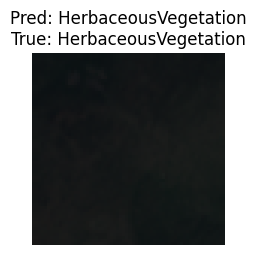

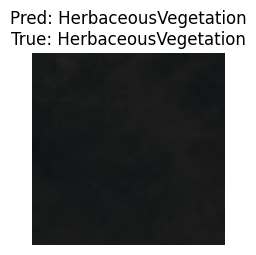

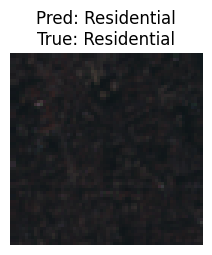

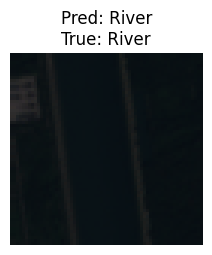

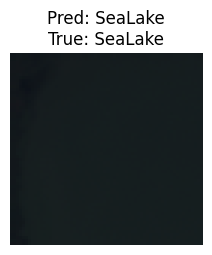

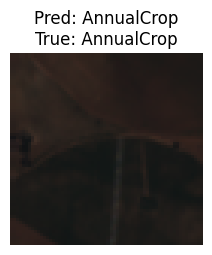

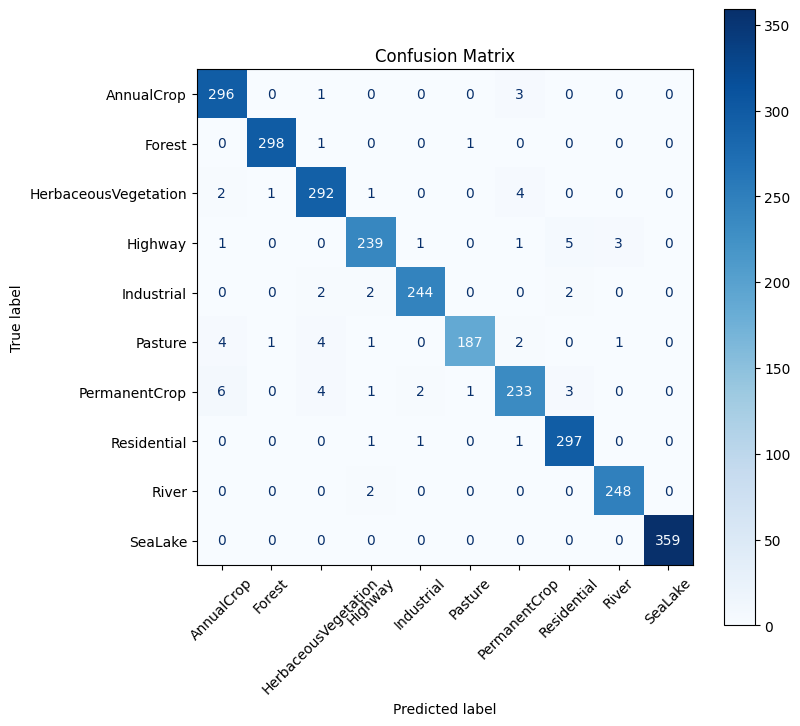

In [ ]:
# Tên lớp EuroSAT (10 lớp)
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway',
               'Industrial', 'Pasture', 'PermanentCrop', 'Residential',
               'River', 'SeaLake']

# Vẽ ảnh dự đoán
visualize_predictions(model, test_loader, class_names, device, num_images=6)

# Vẽ confusion matrix
plot_confusion_matrix(model, test_loader, class_names, device)

In [ ]:
torch.save(model, "/content/drive/MyDrive/resnet_unfrozen.pth")